## Reto 1: Bootstrap

### 1. Objetivos:
    - Practicar la aplicación del algoritmo de boostrap
    - Practicar graficar los resultados del boostrap

---
    
### 2. Desarrollo:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


En este Reto vamos a aplicar la técnica de bootstrap para explorar distribuciones muestrales de estadísticas. Para este Reto puedes elegir cualquiera de los datasets que vienen incluidos en este módulo. Ha llegado el momento de que te dejes guiar por tu curiosidad. Puedes ver una lista de todo lo que hay disponible [acá](../../Datasets/Readme.md).

Elige un dataset que tenga alguna variable numérica que te parezca interesante. Ahora, vamos a realizar algunos análisis sobre esa variable. Recuerda escribir tu análisis de manera ordenada, ya que si lo deseas habrá oportunidad de presentar tus hallazgos al grupo. Lleva a cabo los siguientes pasos:

1. Primero saca tus estimados de locación y dispersión.
2. Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
3. Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
4. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
5. Grafica cada una de las listas resultantes en un histograma.
6. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from google.colab import userdata

In [ ]:
ruta = userdata.get('ruta')

df = pd.read_csv(ruta + 'amazon_fine_food_reviews-clean.csv', index_col=0)

df.head(15)

,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,summary,text
id,,,,,,,,,
258510,B00168V34W,A1672LH9S1XO70,"Lorna J. Loomis ""Canadian Dog Fancier""",13,14,3,1266796800,"Misleading to refer to ""PODS""","This coffee does NOT come in individual ""PODS""..."
207915,B000CQID2Y,A42CJC66XO0H7,"Scott Schimmel ""A Butterfly Dreaming""",2,2,5,1279497600,Delicious,I was a little skeptical after looking at the ...
522649,B007TJGZ0Y,A16QZBG2UN6Z3X,"Toology ""Toology""",0,0,5,1335830400,One of my favs,Gloia Jeans Butter Toffee is one of my favorit...
393368,B000W7PUOW,A3J21CQZG60K35,Hsieh Pei Hsuan,2,2,5,1265673600,Tasty!!,My families and friends love Planters peanuts ...
178178,B002FX2IOQ,A1Z7XV6JU0EV8M,"Barbara ""Barbara""",1,6,1,1301788800,"Organic Valley White 1 % Milkfat Lowfat Milk, ...","Organic Valley White 1 % Milkfat Lowfat Milk, ..."
513585,B000VK33C6,A1H3K0Z1ADGNEH,"Nana ""Southern Cook""",0,0,5,1246147200,Dog loves it!,I adopted a rescue dog who had an allergy to c...
112283,B000LKUTIM,A2FUYQ0UBCZ08C,Lucia A. Dangelo,2,5,1,1330473600,Misadvertising,The ad for this non returnable item is so misl...
449895,B001E5DR5A,A3471OWD2JP88P,Kat,2,2,5,1234137600,Delicious!! Good variety of grains,"I purchased Greenmax ""Chinese Yam and Multi Gr..."
309838,B001I7AZZO,A3NOXOHTTQCTE0,"J. Gigowski ""blest mama""",3,3,5,1282262400,perfect pizza!,Two of my (four) boys is gluten-free. Pizza is...


In [ ]:
# Calcular estimados de localización
media = df['score'].mean()
mediana = df['score'].median()

In [ ]:
print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 4.173597917106467
Mediana: 5.0


In [ ]:
# Calcular estimados de dispersión
desviacion_estandar = df['score'].std()
q1 = df['score'].quantile(0.25)
q3 = df['score'].quantile(0.75)
iqr = q3 - q1

In [ ]:
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Rango intercuartílico (IQR): {iqr}")

Desviación estándar: 1.3134590980103293
Rango intercuartílico (IQR): 1.0


In [ ]:
# Resumen completo
resumen = df['score'].describe()
print(resumen)

count    14211.000000
mean         4.173598
std          1.313459
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: score, dtype: float64


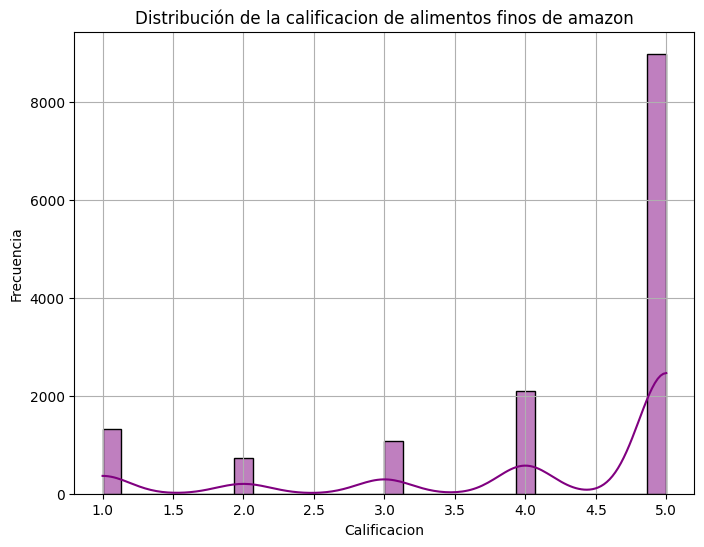

In [ ]:
# Graficar histograma

plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.histplot(df['score'], bins=30, kde=True, color='purple')  # Histograma con curva de densidad
plt.title('Distribución de la calificacion de alimentos finos de amazon')  # Título
plt.xlabel('Calificacion')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.grid(True)  # Mostrar cuadrícula
plt.show()

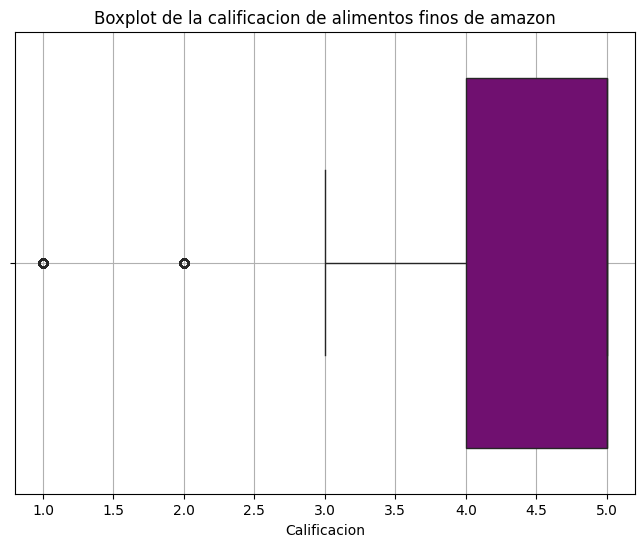

In [ ]:
# Graficas Boxplot

plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.boxplot(x=df['score'], color='purple')  # Boxplot
plt.title('Boxplot de la calificacion de alimentos finos de amazon')  # Título
plt.xlabel('Calificacion')  # Etiqueta del eje X
plt.grid(True)  # Mostrar cuadrícula
plt.show()

In [ ]:
# Definir umbrales para considerar valores atípicos
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar valores dentro de los límites
df_filtrada = df[(df['score'] >= lower_bound) & (df['score'] <= upper_bound)]


In [ ]:
# Aplicar Bootstrap en tres escenarios
def bootstrap_remuestreo(data, sample_size, n_remuestreos=100000):
    bootstrap_estimates = [np.random.choice(data, size=sample_size, replace=True).mean() for _ in range(n_remuestreos)]
    return bootstrap_estimates

In [ ]:
bootstrap_5 = bootstrap_remuestreo(df_filtrada['score'], 5)
bootstrap_20 = bootstrap_remuestreo(df_filtrada['score'], int(len(df_filtrada['score']) * 0.2))
bootstrap_90 = bootstrap_remuestreo(df_filtrada['score'], int(len(df_filtrada['score']) * 0.9))

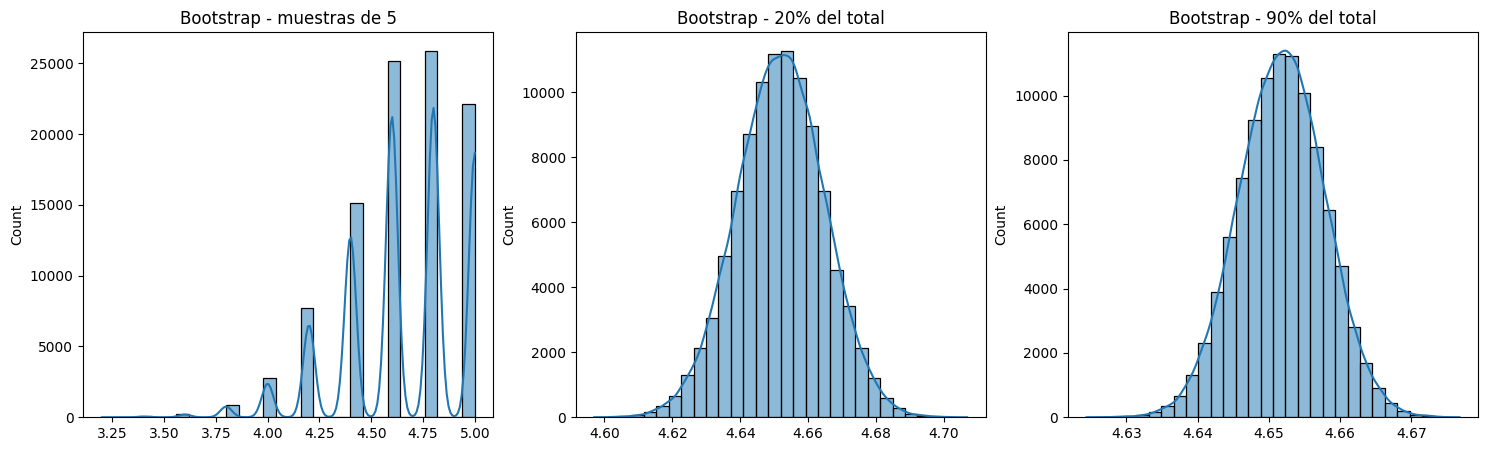

In [ ]:
# Graficar histogramas de cada bootstrap

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(bootstrap_5, bins=30, kde=True, ax=axes[0])
axes[0].set_title("Bootstrap - muestras de 5")

sns.histplot(bootstrap_20, bins=30, kde=True, ax=axes[1])
axes[1].set_title("Bootstrap - 20% del total")

sns.histplot(bootstrap_90, bins=30, kde=True, ax=axes[2])
axes[2].set_title("Bootstrap - 90% del total")

plt.show()

In [ ]:
# Calcular asimetría y curtosis de cada una

asimetria_5, curtosis_5 = skew(bootstrap_5), kurtosis(bootstrap_5)
asimetria_20, curtosis_20 = skew(bootstrap_20), kurtosis(bootstrap_20)
asimetria_90, curtosis_90 = skew(bootstrap_90), kurtosis(bootstrap_90)

In [ ]:
resultados_bootstrap = pd.DataFrame({
    "Muestra": ["5 elementos", "20% del total", "90% del total"],
    "Asimetría": [asimetria_5, asimetria_20, asimetria_90],
    "Curtosis": [curtosis_5, curtosis_20, curtosis_90]
})

print(f"Asimetría y Curtosis de cada Bootstrap:")
print(resultados_bootstrap)

Asimetría y Curtosis de cada Bootstrap:
         Muestra  Asimetría  Curtosis
0    5 elementos  -0.728425  0.295099
1  20% del total  -0.034386 -0.007977
2  90% del total  -0.018869  0.005485
